In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
cd \\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\021621\EE11P1LT\

\\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\021621\EE11P1LT


In [61]:
cd \\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\012821\EE8P6LT\

\\goeppert\nlab-nas\freely_moving_ephys\ephys_recordings\012821\EE8P6LT


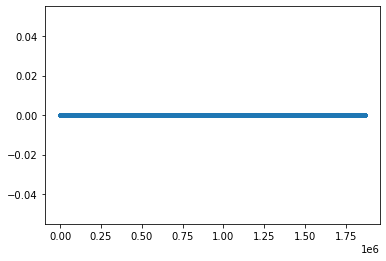

In [82]:
clust = np.load('spike_clusters.npy')
sptemp = np.load('spike_templates.npy')
templates = np.load('templates.npy')
cmap = np.load('channel_positions.npy')

# ephys_data_master holds information that is same for all recordings (i.e. cluster information + waveform)
ephys_data_master = pd.read_csv('cluster_info.tsv',sep = '\t',index_col=0)

plt.plot(clust-sptemp[:,0],'.')

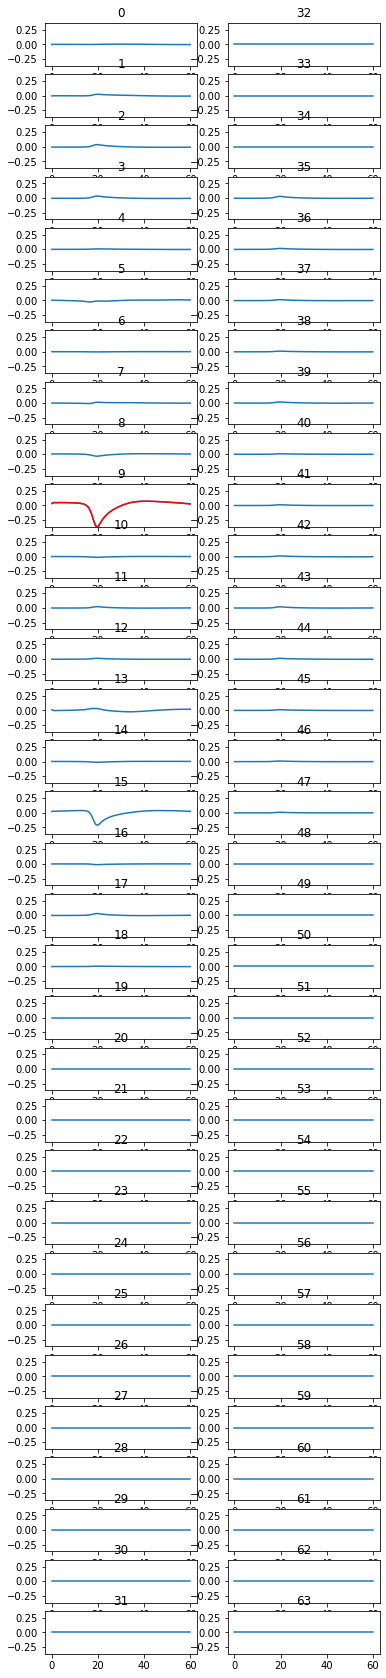

In [65]:
ind =4
ch = ephys_data_master.at[ind,'ch']
plt.figure(figsize = (6,30))
rng = np.max(np.abs(templates[ind,21:,:]))
for i in range(64):
    if i<32:
        plt.subplot(32,2,2*i+1)
    else:
        plt.subplot(32,2,2*(i-32)+2) 
#    plt.subplot(64,1,i+1)
    plt.title(str(i))
    plt.plot(templates[ind,21:,i])
    if i==ch:
        plt.plot(templates[ind,21:,i],'r')
    plt.ylim([-rng,rng])
        

In [69]:
ephys_data_master

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh
id,,,,,,,,,,
0,240.7,144.1,mua,18.359318,2,726.0,8.809531,noise,49199,0
1,1262.2,6.6,mua,105.883057,5,651.0,0.295985,noise,1653,0
2,722.4,104.5,mua,59.974197,5,651.0,0.144680,noise,808,0
3,1179.1,inf,mua,40.512146,11,501.0,0.018085,noise,101,0
4,1796.3,3.6,good,87.257454,9,551.0,5.929186,good,33113,0
...,...,...,...,...,...,...,...,...,...,...
78,1147.5,33.9,mua,71.710815,31,1.0,23.496142,mua,131220,0
79,1087.3,36.7,mua,67.406174,53,251.0,9.022074,mua,50386,0
80,1044.3,16.3,mua,76.840141,55,201.0,3.044185,mua,17001,0


In [64]:
np.where(ephys_data_master['KSLabel']=='good')


(array([ 4, 18, 29, 49, 63, 72, 73, 75, 81, 82], dtype=int64),)

In [ ]:
# insert waveforms
ephys_data_master['waveform'] = np.nan
ephys_data_master['waveform'] = ephys_data_master['waveform'].astype(object) # does this need to be an object? spikeT is an object because they are all diff length, but I don't think these need to be -cmn
for i, ind in enumerate(ephys_data_master.index):
    ephys_data_master.at[ind,'waveform'] = templates[ind,21:,ephys_data_master.at[ind,'ch']]